<a href="https://colab.research.google.com/github/AdrianCPC/Profundizacion_Data_Analysis/blob/main/Segmentos_de_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clusterización de Datos: Segmentación de clientes

En este notebook estaremos desarrollando un análisis completo de Ciencia de Datos con Machine Learning para la segmentación de clientes.

De manera puntual, emplearemos una técnica de segmentación del comportamiento del cliente basada en datos conocida como RFM (Recencia o Actualidad, Frecuencia, y Valor Monetario).

El dataset utilizado fue adaptado para nuestro entrenamiento, tomando como referencia un dataset de Kaggle llamado **Brazilian E-Commerce Public Dataset by Olist**.

*dataset: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce*

## Aula 1

### 1.2 Importando y explorando el dataset

In [6]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv('/content/drive/MyDrive/e_commerce.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   muestra            116581 non-null  int64  
 1   id_cliente         116581 non-null  object 
 2   id_unico_cliente   116581 non-null  object 
 3   item_id            116581 non-null  int64  
 4   cp_cliente         116581 non-null  int64  
 5   ciudad_cliente     116581 non-null  object 
 6   estado_cliente     116581 non-null  object 
 7   id_pedido          116581 non-null  object 
 8   status_pedido      116581 non-null  object 
 9   horario_pedido     116581 non-null  object 
 10  pedido_aprobado    116567 non-null  object 
 11  pedido_entregador  115368 non-null  object 
 12  pedido_entregado   114066 non-null  object 
 13  fecha_estimada     116581 non-null  object 
 14  id_vendedor        116581 non-null  object 
 15  precio             116581 non-null  float64
 16  pr

### 1.2.1 Columnas y Descripción

**muestra**: Numeración creciente de los datos.

**id_cliente**: Número de identificación del cliente que realiza la compra.

**id_unico_cliente**: Número único para cada cliente en función de su dirección IP, independiente de la compra.

**item_id**: Número de identificación del item comprado.

**cp_cliente**: Código postal del cliente.

**ciudad_cliente**: Ciudad donde se realizó el pedido.

**estado_cliente**: Estado donde se realizó el pedido.

**id_pedido**: Número de identificación de la compra.

**status_pedido**: Status del pedido (Ej. Entregado, facturado, procesando, etc).

**horario_pedido**: Fecha y hora en la cual se realizó el pedido.

**pedido_aprobado**: Fecha y hora en la cual se aprobó el pedido.  
**pedido_entregador**: Fecha y hora en la cual se hizo entrega del pedido a la empresa transportadora.  

**pedido_entregado**:Fecha y hora en la cual se hizo entrega del pedido al cliente.

**fecha_estimada**:Fecha y hora estimada de entrega.

**id_vendedor**: Número de identificación del vendedor.

**precio**: Precio del producto.

**precio_envio**: Precio del envío.

**pago_secuencial**: Compra en la cual el cliente solicita más de una forma de pago (Ej. Crédito y débito, etc).

**pago_tipo**: Método de pago (Ej. factura, débito, voucher).

**pago_cuotas**: Número de cuotas escogido por el cliente para realizar el pago.

**pago_valor**: Valor total pago.

**review**: Nota que el consumidor da a todo el proceso.

**categoria**: Categoría del item comprado.

**cp_vendedor**: Código postal del vendedor.

**ciudad_vendedor**: Ciudad del vendedor.

**estado_vendedor**: Estado del vendedor.

In [10]:
df.sample(5)

,muestra,id_cliente,id_unico_cliente,item_id,cp_cliente,ciudad_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,precio_envio,pago_secuencial,pago_tipo,pago_cuotas,pago_valor,review,categoria,cp_vendedor,ciudad_vendedor,estado_vendedor
53200,53200,44ae1844515695a6e2c642c586a27e10,429de3d8004cbe46652a0e069fc545e3,1,21073,medellin,ANT,6746bff3c11cafd29a7f19f7fecd5107,entregado,2018-01-25 15:57:50,...,14.10,1,voucher,1,34.09,5,informatica_accesorios,3564,bogota,DC
104185,104185,45aecdf5a12c416d48ec218648603efd,5d25f401e21fbed1124ab8e14cee31e0,1,41260,barranquilla,ATL,c5f2a2829db09bd21fbbb46215b74a2c,entregado,2017-07-16 20:52:43,...,23.88,1,credito,8,167.87,5,cama_mesa_baño,14940,bogota,DC
34312,34312,2e45292979b9b2700ea09560eeb0f803,bb8a37225e0279ac8a274c9765617eaf,1,74663,quibdo,CHO,00143d0f86d6fbd9f9b38ab440ac16f5,entregado,2017-10-16 15:29:43,...,15.10,1,credito,1,109.29,1,deporte_recreacion,18055,bogota,DC
107224,107224,7fc4a63752bfc3f56f4b3c89afcf083a,a257d59af2ac0e177a804a68e0afcd73,1,1422,bogota,DC,14f39bb597d6744309d74e7b9daf849f,entregado,2017-04-11 14:26:33,...,17.51,1,credito,1,127.51,3,bebes,86706,florencia,CAQ
59950,59950,657eda4e409c3207fb49f2291e11e582,f9ff64ebbdcbd3d606097327fd6b0a26,1,73900,quibdo,CHO,f93bcee6c5595d8b07ad4f799fe5b590,entregado,2018-02-24 01:14:06,...,35.34,1,credito,5,255.24,3,automotivo,83830,florencia,CAQ


### 1.3 Análisis exploratorio de los datos

In [11]:
def plot_porcentajes(estado,datos):
  plt.figure(figsize=(20,8))
  grafico = sns.countplot(x=estado,data=datos,orient='h')
  grafico.set_ylabel('Conteo', fontsize=17)

  sizes = []

  for p in grafico.patches:
    height = p.get_height()
    sizes.append(height)
    grafico.text(p.get_x() + p.get_width()/1.6, height+200, f'{round(height/len(datos)*100,2)}%',ha='center', va='bottom', fontsize=12)
    grafico.set_ylim(0,max(sizes)*1.1)

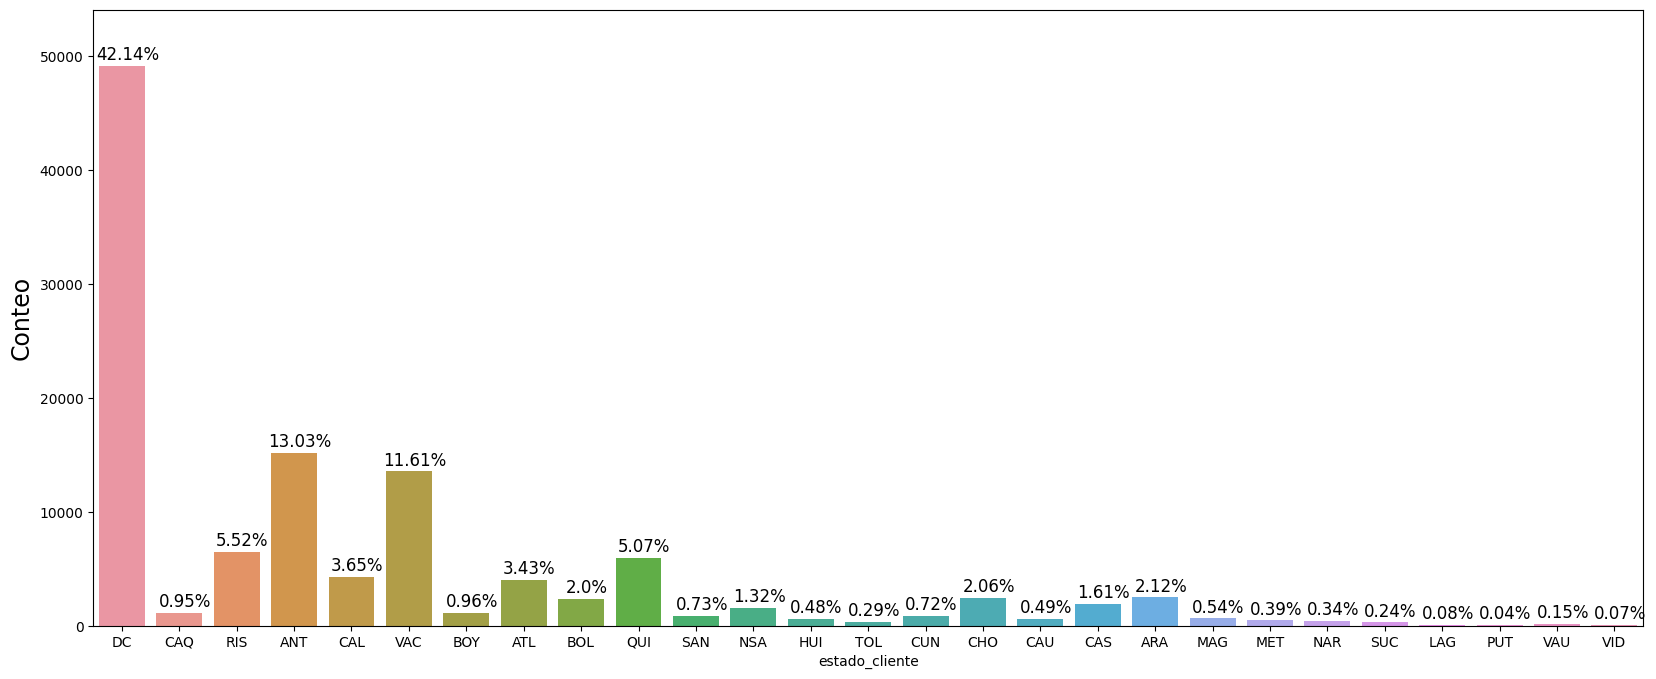

In [12]:
plot_porcentajes('estado_cliente',df)

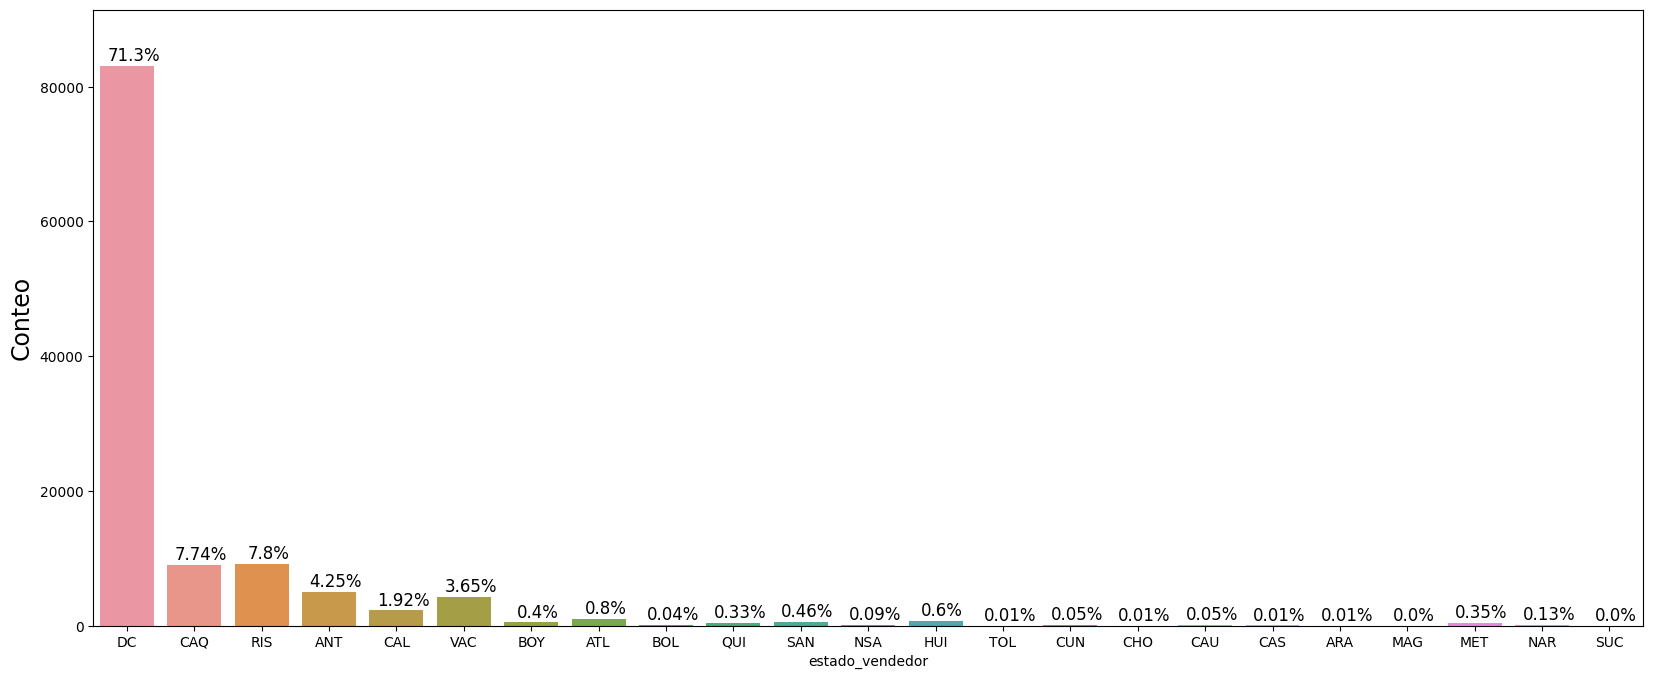

In [13]:
plot_porcentajes('estado_vendedor',df)

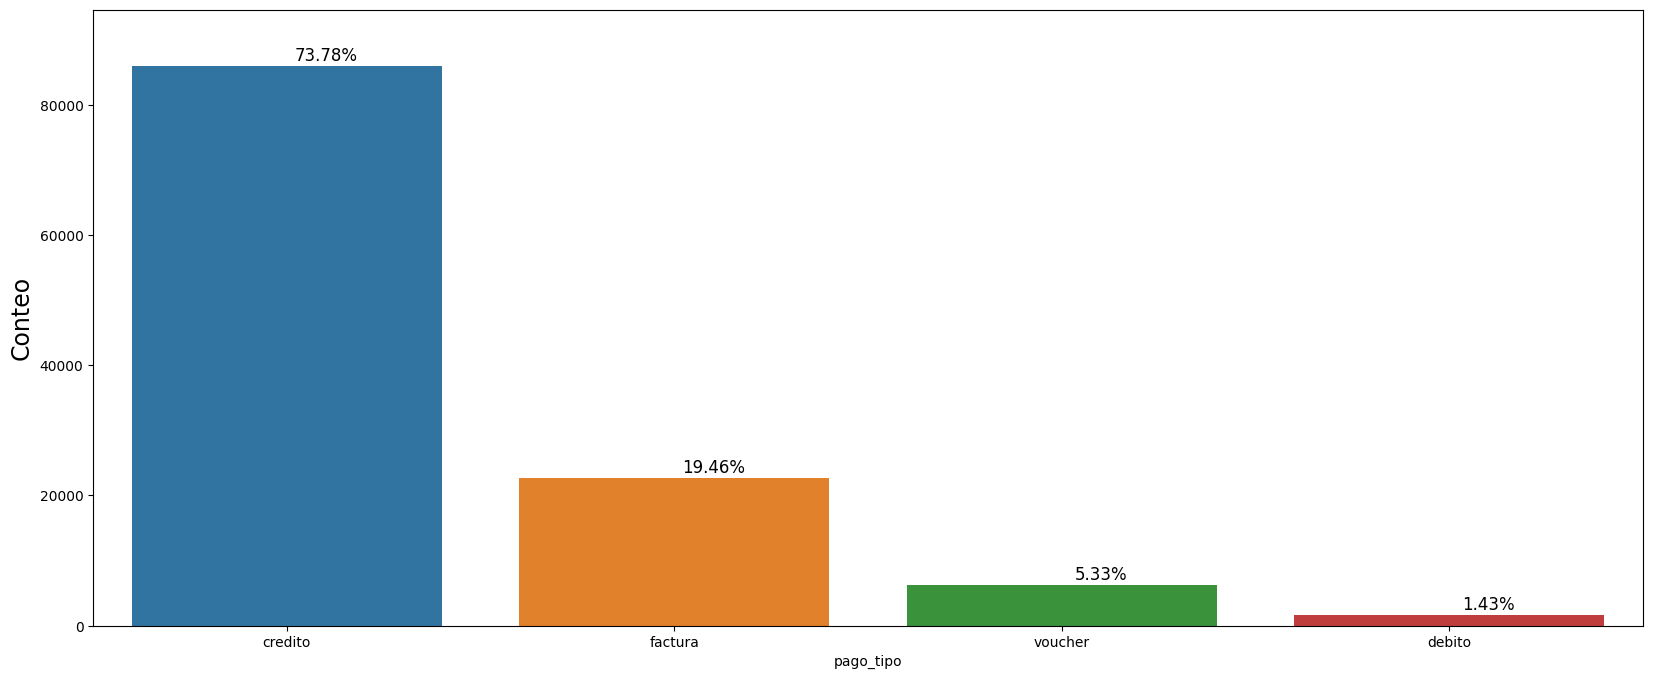

In [14]:
plot_porcentajes('pago_tipo',df)

Lo que aprendimos en esta aula:

Cuáles son las principales etapas en un problema de segmentación;

Qué tipo de datos necesitamos obtener;

Cómo el análisis exploratorio nos ayuda a identificar insights;

Cómo añadir textos informativos a los gráficos.

## Aula 2

### 2.1 Modelo RFM

#### **Recencia (R)**
##### ¿Hace cuántos días fue la última compra que realizó este cliente?

#### **Frecuencia (F)**
##### ¿Cuántas compras este cliente hizo en tu empresa, desde que se registró?

#### **Valor Monetario (M)**
##### ¿Cuánto dinero este cliente ya gastó en tu empresa?

In [15]:
df_olist = df[['id_unico_cliente','id_cliente','horario_pedido','item_id','precio']]
df_olist.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,precio
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99


In [16]:
df_compra = df.groupby('id_unico_cliente').horario_pedido.max().reset_index()
df_compra.columns = ['id_unico_cliente', 'fecha_max_compra']
df_compra['fecha_max_compra'] = pd.to_datetime(df_compra['fecha_max_compra'])
df_compra.head()

,id_unico_cliente,fecha_max_compra
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [17]:
#creando resencia en dias
df_compra['recencia'] = (df_compra['fecha_max_compra'].max() - df_compra['fecha_max_compra']).dt.days
df_compra.head()

,id_unico_cliente,fecha_max_compra,recencia
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292


In [18]:
#dataset unir con compras
df_usuario = pd.merge(df_olist, df_compra[['id_unico_cliente','recencia']], on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,precio,recencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211


### 2.2 Regla del codo

Ahora, necesitamos usar el Método del Codo, la idea es ejecutar el algoritmo KMeans para varias cantidades diferentes de clusters y así poder determinar el número ideal de clusters.

A medida que aumentamos el número de clusters con KMeans, las diferencias entre los diversos clusters disminuyen y las diferencias por dentro de los clusters van aumentando. Entonces, debemos hallar un equilibrio de modo que las observaciones que conforman cada agrupación sean lo más homogéneas posible y que las diversas agrupaciones se puedan diferenciar entre sí.

### 2.3 Codificando la Regla del Codo

In [19]:
from sklearn.cluster import KMeans

def calcular_inercia(datos):
  inercia = []
  for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X=datos)
    datos['clusters'] = kmeans.labels_
    inercia.append(kmeans.inertia_)

  return inercia


In [20]:
df_recencia = df_usuario[['recencia']]
df_recencia.head() #valores de recencia de clientes

,recencia
0,474
1,298
2,298
3,483
4,211


In [21]:
suma_cuadrados = calcular_inercia(df_recencia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-19-80a854619363>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['clusters'] = kmeans.labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-19-80a854619363>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

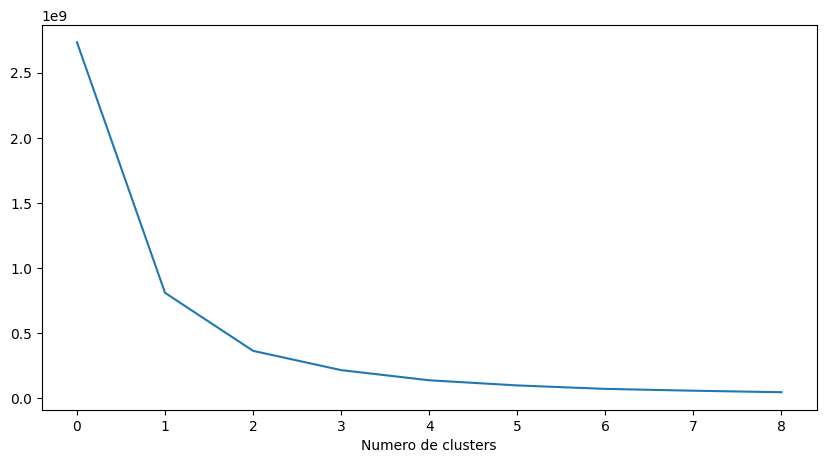

In [22]:
plt.figure(figsize=(10,5))
plt.plot(suma_cuadrados)
plt.xlabel('Numero de clusters')
plt.show()

### 2.4 Regla Matemática

¿Cómo podemos identificar si el mejor número de clusters es 3, 4 o 5?

¡Existe una solución matemática!



> ![](https://miro.medium.com/max/2775/1*9J7Wnh5L0eIcHXBeWlzvNA.png)


Lo primero que debemos hacer, es definir una recta conectando el primer punto (cluster 1) al último punto (cluster 9).

En este caso, P0 es el punto del cluster 1 y P1 es el punto del cluster 9. El par (x,y) representa las coordenadas de cualquier punto desde el cual deseemos  calcular la distancia hasta la recta. Calculando todas las distancias, lograremos determinar el punto que indica el número ideal de clusters.

### 2.5 Codificando la Regla Matemática

In [23]:
def numero_ideal_clusters(inercia):
  x1,y1 = 2, inercia[0]
  x2,y2 = 20,inercia[-1]

  distancia = []

  for i in range(len(inercia)):
    x0 = i+2
    y0 = inercia[i]

    numerador = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1-y2*x1)
    denominador = ((y2-y1)**2 + (x2-x1)**2)**(1/2)
    distancia.append(numerador/denominador)

  return distancia.index(max(distancia)) + 2 # apartir de 2 por que se incia en 0

In [24]:
print(f'El numero ideal de clusters es: {numero_ideal_clusters(suma_cuadrados)}')

El numero ideal de clusters es: 4


Ejercicio de Alura

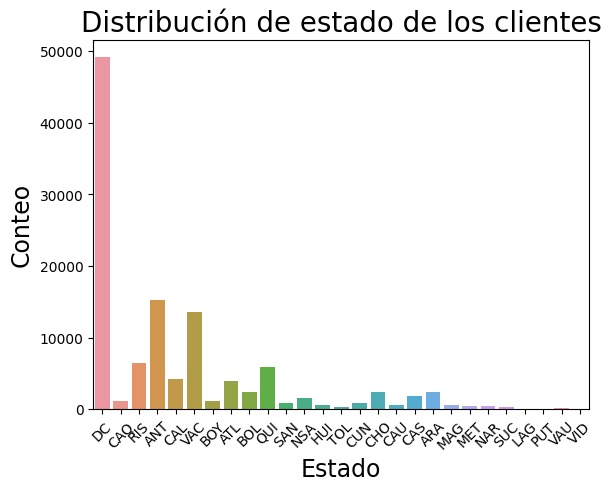

In [25]:
g = sns.countplot(x='estado_cliente', data=df, orient='h')
g.set_title("Distribución de estado de los clientes", fontsize=20)
g.set_xlabel("Estado", fontsize=17)
g.set_ylabel("Conteo", fontsize=17)
g.set_xticklabels(g.get_xticklabels(),rotation=45);

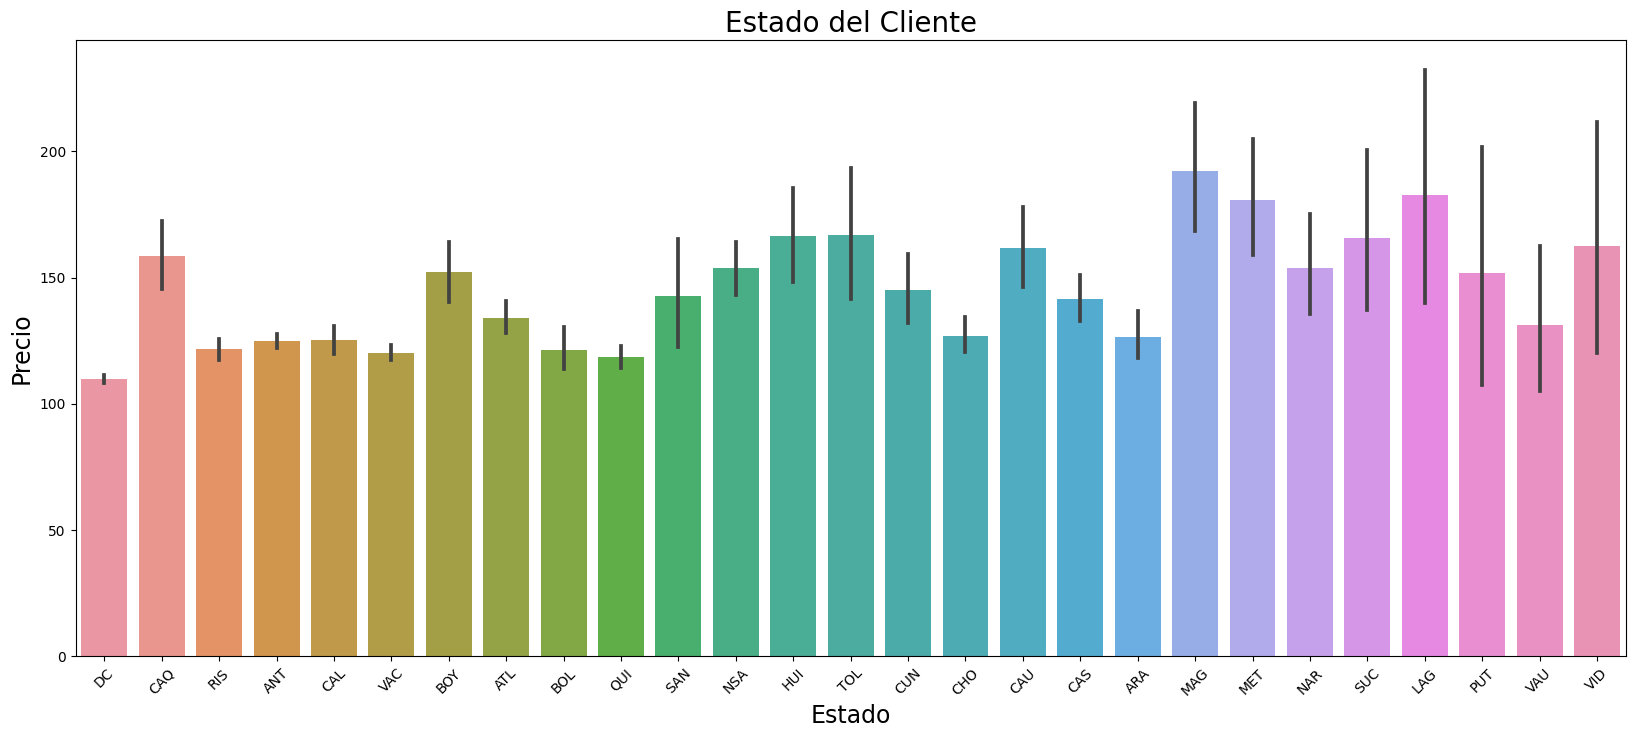

In [26]:
# cuáles estados provienen las compras de mayor valor
plt.figure(figsize=(20,8))
g2 = sns.barplot(x='estado_cliente', y='precio',
                 data=df[df['precio'] != -1])
g2.set_title("Estado del Cliente", fontsize=20)
g2.set_xlabel("Estado", fontsize=17)
g2.set_ylabel("Precio", fontsize=17)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45);


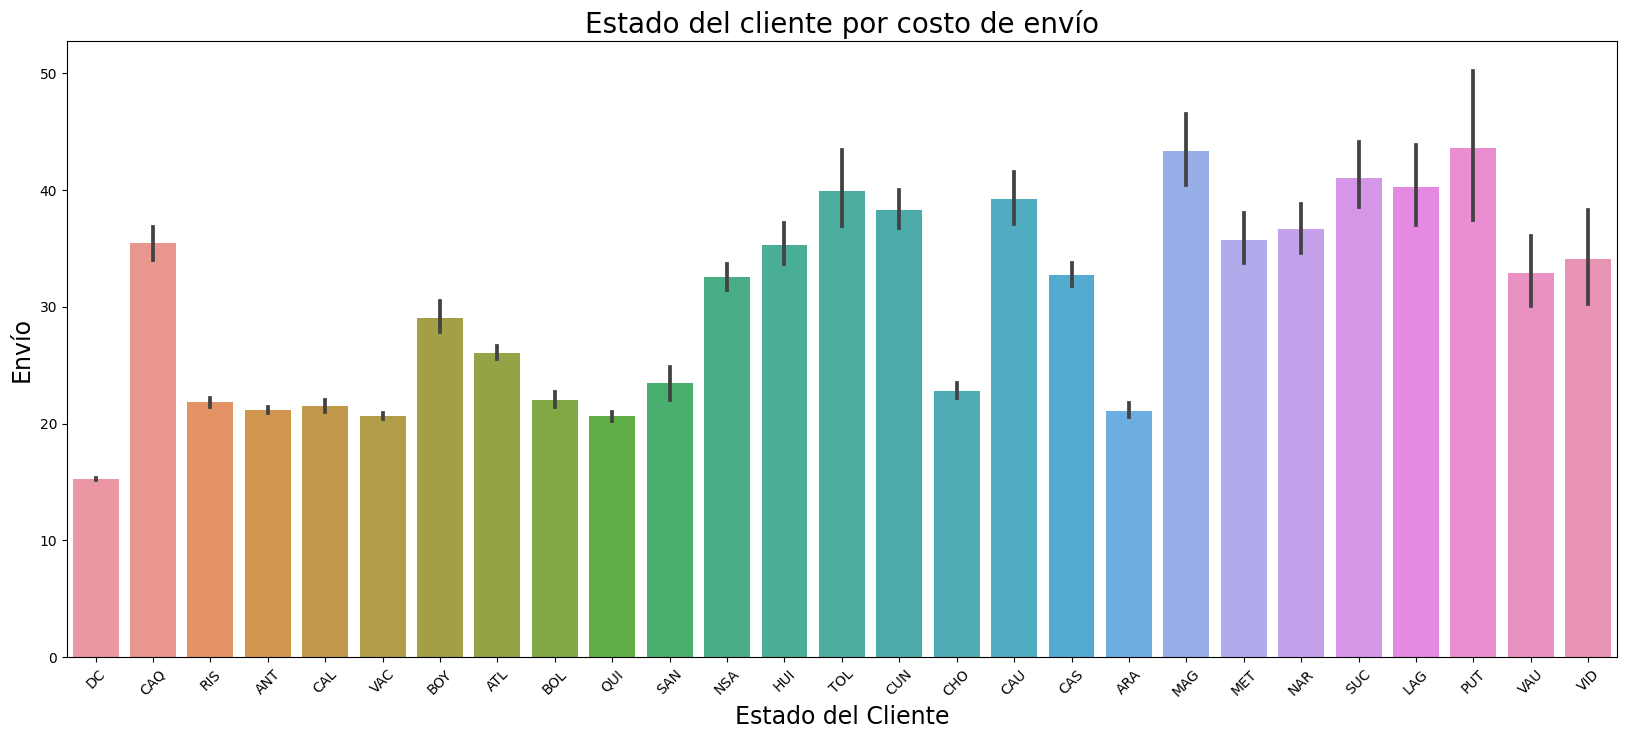

In [27]:
#cuáles estados tienen mayor costo de envío

plt.figure(figsize=(20,8))
g3 = sns.barplot(x='estado_cliente', y='precio_envio',
                 data=df[df['precio_envio'] != -1])
g3.set_title("Estado del cliente por costo de envío", fontsize=20)
g3.set_xlabel("Estado del Cliente", fontsize=17)
g3.set_ylabel("Envío", fontsize=17)
g3.set_xticklabels(g3.get_xticklabels(),rotation=45);

Lo que aprendimos en esta aula:

El modelo RFM (recencia, frecuencia e ingresos);

Cómo funciona el algoritmo k-means;

Cómo usar la regla del codo para definir el número de clusters;

Cómo usar una regla matemática para confirmar el número ideal de clusters.

## Aula 3

### 3.1 Clusterizando la Recencia

In [28]:
kmeans = KMeans(n_clusters=4)
df_usuario['recencia_cluster'] = kmeans.fit_predict(df_recencia)
df_usuario.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,id_unico_cliente,id_cliente,horario_pedido,item_id,precio,recencia,recencia_cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,2
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,1
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,1
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,2
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,0


In [29]:
agrupado_por_cluster = df_usuario.groupby('recencia_cluster')['recencia'].mean().reset_index()
agrupado_por_cluster.head()

,recencia_cluster,recencia
0,0,187.293338
1,1,319.957296
2,2,490.622269
3,3,66.405850


In [30]:
agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by='recencia', ascending=False).reset_index(drop=True)
agrupado_por_cluster_ordenado.head()

,recencia_cluster,recencia
0,2,490.622269
1,1,319.957296
2,0,187.293338
3,3,66.405850


In [31]:
agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index
agrupado_por_cluster_ordenado.head()

,recencia_cluster,recencia,index
0,2,490.622269,0
1,1,319.957296,1
2,0,187.293338,2
3,3,66.405850,3


In [34]:
juntando_cluster = pd.merge(df_usuario, agrupado_por_cluster_ordenado[['recencia_cluster','index']], on='recencia_cluster')
juntando_cluster.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,precio,recencia,recencia_cluster,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,2,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,2,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,2,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,2,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,2,0


In [35]:
removiendo_datos = juntando_cluster.drop(['recencia_cluster'], axis=1)
removiendo_datos.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,precio,recencia,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


In [36]:
df_final = removiendo_datos.rename(columns={'index':'recencia_cluster'})
df_final.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,precio,recencia,recencia_cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


In [37]:
df_final.sample(3)

,id_unico_cliente,id_cliente,horario_pedido,item_id,precio,recencia,recencia_cluster
106519,f10f4af2c01fdf887cdfb02287a334e3,e48488824096ce9278ca3b4bb6f32537,2018-07-17 15:38:46,1,17.90,47,3
105244,6e9b8e9f9c3fad22d6f81b2628750018,002ef7e55600d44ead53f7c1644e5222,2018-06-19 21:08:43,1,174.99,75,3
40401,8f9f5d6a8f3bbe2bacd9d7fb1a0631d8,40a9f7530f5b05737ed97fda2e03e6df,2017-11-23 17:40:25,1,49.90,283,1


In [49]:
def ordenador_cluster(cluster_actual, target,df,asc=False):

  agrupado_por_cluster = df_usuario.groupby(cluster_actual)[target].mean().reset_index()
  agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by=target, ascending=asc).reset_index(drop=True)
  agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index
  juntando_cluster = pd.merge(df_usuario, agrupado_por_cluster_ordenado[[cluster_actual,'index']], on=cluster_actual)
  removiendo_datos = juntando_cluster.drop([cluster_actual], axis=1)
  df_final = removiendo_datos.rename(columns={'index':cluster_actual})

  return df_final


In [40]:
df_usuario = ordenador_cluster('recencia_cluster','recencia',df_usuario)

In [41]:
df_usuario.groupby('recencia_cluster')['recencia'].describe()

,count,mean,std,min,25%,50%,75%,max
recencia_cluster,,,,,,,,
0,20324.0,490.622269,59.293154,406.0,444.0,481.0,533.0,728.0
1,30957.0,319.957296,44.086874,254.0,281.0,313.0,357.0,405.0
2,33712.0,187.293338,35.169771,127.0,158.0,187.0,218.0,253.0
3,31588.0,66.405850,35.800016,0.0,33.0,67.0,99.0,126.0


### 3.2 Clusterizando la Frecuencia

In [43]:
df_frecuencia = df.groupby('id_unico_cliente').pedido_aprobado.count().reset_index()
df_frecuencia.columns =['id_unico_cliente','frecuencia']
df_frecuencia.head()

,id_unico_cliente,frecuencia
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [44]:
df_usuario = pd.merge(df_usuario,df_frecuencia, on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,precio,recencia,recencia_cluster,frecuencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1


In [45]:
df_frecuencia = df_usuario[['frecuencia']]
kmeans = KMeans(n_clusters=4)
df_usuario['frecuencia_cluster'] = kmeans.fit_predict(df_frecuencia)
df_usuario.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,id_unico_cliente,id_cliente,horario_pedido,item_id,precio,recencia,recencia_cluster,frecuencia,frecuencia_cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0


In [46]:
df_usuario.groupby('frecuencia_cluster')['frecuencia'].describe()

,count,mean,std,min,25%,50%,75%,max
frecuencia_cluster,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0
2,9205.0,5.644432,2.138491,4.0,4.0,5.0,6.0,13.0
3,731.0,21.489740,6.588977,14.0,15.0,21.0,24.0,38.0


In [50]:
df_usuario = ordenador_cluster('frecuencia_cluster','frecuencia',df_usuario, asc=True)

In [51]:
df_usuario.groupby('frecuencia_cluster')['frecuencia'].describe() #mayor dias en compras a menos dias en compras

,count,mean,std,min,25%,50%,75%,max
frecuencia_cluster,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,9205.0,5.644432,2.138491,4.0,4.0,5.0,6.0,13.0
2,731.0,21.489740,6.588977,14.0,15.0,21.0,24.0,38.0
3,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0


### 3.3 Clusterizando el Valor Monetario (Ingresos)

In [52]:
df_ingresos = df.groupby('id_unico_cliente').pago_valor.sum().reset_index()
df_ingresos.columns = ['id_unico_cliente','ingresos']
df_usuario = pd.merge(df_usuario, df_ingresos, on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,precio,recencia,recencia_cluster,frecuencia,frecuencia_cluster,ingresos
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0,146.87
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0,140.61
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0,142.05
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0,155.70
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0,148.33


In [53]:
df_pago = df_usuario[['ingresos']]
df_pago.head()

,ingresos
0,146.87
1,140.61
2,142.05
3,155.70
4,148.33


In [56]:
#ingreso a kmeans los datos de ingresos

kmeans=KMeans(n_clusters=4)
df_usuario['ingresos_cluster'] = kmeans.fit_predict(df_pago)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [57]:
df_usuario = ordenador_cluster('ingresos_cluster','ingresos', df_usuario, asc=True)

In [58]:
df_usuario.groupby('ingresos_cluster')['ingresos'].describe()

,count,mean,std,min,25%,50%,75%,max
ingresos_cluster,,,,,,,,
0,114798.0,258.918361,367.870074,9.59,69.90,132.60,269.28,2971.85
1,1584.0,5709.531187,2885.449918,2987.84,3610.00,4564.75,7006.19,16313.60
2,191.0,27358.656911,10032.832924,17069.76,19167.26,25051.89,30186.00,45256.00
3,8.0,109312.640000,0.000000,109312.64,109312.64,109312.64,109312.64,109312.64


Alura ejercicio

In [59]:
#Averiguando cuales estados poseen los valores de envios mas altos, en funcion de cliente y vendedor,
#a partir de un mapa de calor


#creando la division de los departamentos por regiones como primer paso

amazonica = ['CAQ', 'PUT', 'VAU','MG']
andina= ['ANT','BOY', 'CAL', 'HUI', 'CUN', 'DC', 'NSA','SAN','RIS','QUI']
caribe =  ['ATL', 'BOL', 'CES', 'MAG','SUC',]
orinoquia = ['ARA', 'CAS', 'MET' ,'VID' ]
pacifica = ['NAR', 'VAC','CHO','CAU']

In [60]:
#definicion de la variable region y donde cada estado se ubica


df.loc[df['estado_cliente'].isin(amazonica), 'region'] = 'Amazónica'
df.loc[df['estado_cliente'].isin(andina), 'region'] = 'Andina'
df.loc[df['estado_cliente'].isin(caribe), 'region'] = 'Caribe'
df.loc[df['estado_cliente'].isin(orinoquia), 'region'] = 'Orinoquía'
df.loc[df['estado_cliente'].isin(pacifica), 'region'] = 'Pacífica'

In [62]:
def mapa_calor(df, cols, normalize=False, values=None, aggfunc=None):
    temp = cols
    cm = sns.light_palette("green", as_cmap=True)
    return pd.crosstab(df[temp[0]], df[temp[1]], normalize=normalize, values=values, aggfunc=aggfunc).style.background_gradient(cmap = cm)

In [63]:
#generando un mapa de calor

mapa_calor(df[df['precio'] != -1], ['estado_vendedor', 'region'],
              values=df[df['precio'] != -1]['precio_envio'], aggfunc='mean')

region,Amazónica,Andina,Caribe,Orinoquía,Pacífica
estado_vendedor,,,,,
ANT,40.917755,17.996081,26.740339,27.671523,19.404684
ARA,nan,42.190000,23.650000,24.940000,33.133333
ATL,26.614167,21.130385,25.221216,13.507632,18.628176
BOL,20.930000,41.551724,34.733333,24.035000,29.515000
BOY,38.987143,31.783188,22.355286,17.108627,27.498879
CAL,41.045143,23.377511,45.890106,39.183793,31.512180
CAQ,48.795926,20.524103,40.335485,36.074592,25.784731
CAS,nan,47.736364,66.830000,nan,54.020000
CAU,nan,22.533056,29.412308,24.427500,23.956000


Lo que aprendimos en esta aula:

Cómo clusterizar los datos usando k-means;

Cómo ordenar los datos de forma que el número de cluster sirva como método de puntuación;

A crear funciones de forma simplificada al segmentar las operaciones.

## Aula 4

### 4.1 Creando la puntuación

### 4.2 Análisis visual de los resultados